## Private and Public Funding of NYC Parks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#Import geodata
boros = gpd.read_file("/Users/juliekerisel/Desktop/info615/data/BoroughBoundaries.zip")
nta = gpd.read_file("/Users/juliekerisel/Downloads/2020NTA.zip")
parks_properties = gpd.read_file("/Users/juliekerisel/Downloads/Parks_Properties.zip")

In [3]:
#Import tabular funding data 
df = pd.read_csv("/Users/juliekerisel/Downloads/new_parks.csv")

#### 1. Exploring funding data

In [4]:
#Parks with 10 highest maintenance funding
df.sort_values(by= 'maintenance_funding', ascending=False).head(10)

,boro,Name_Proper,maintenance_funding,private_funding,ACREAGE
571,Queens,Flushing Meadows Corona Park,2111504,595902,897.69
1462,Brooklyn,Prospect Park,1173653,1942874,540.51
577,Queens,Forest Park,1112711,0,506.86
597,Staten Island,Franklin D. Roosevelt Boardwalk And Beach,824079,0,644.35
1523,Manhattan,Riverside Park,724119,1370333,260.44
1388,Bronx,Pelham Bay Park,722513,0,2771.75
357,Brooklyn,Coney Island Beach & Boardwalk,690924,0,399.47
253,Brooklyn,Canarsie Park,623409,0,132.20
1844,Bronx,Van Cortlandt Park,549162,116477,1146.43
391,Bronx,Crotona Park,538642,3000,127.50


In [5]:
#Parks with 10 highest private funding
df.sort_values(by= 'private_funding', ascending=False).head(11)

,boro,Name_Proper,maintenance_funding,private_funding,ACREAGE
281,Manhattan,Central Park,446300,24717743,840.64
234,Manhattan,Bryant Park,2408,8584181,9.60
1462,Brooklyn,Prospect Park,1173653,1942874,540.51
218,Brooklyn,Brooklyn Bridge Park,13008,1482623,21.38
1039,Manhattan,Madison Square Park,14042,1421056,6.23
1523,Manhattan,Riverside Park,724119,1370333,260.44
1755,Manhattan,The Battery,45736,1358909,21.88
540,Manhattan,Father Duffy Square,1092,1112098,0.08
571,Queens,Flushing Meadows Corona Park,2111504,595902,897.69
834,Queens,Idlewild Park,6642,530000,180.85


In [6]:
#Median maintenance funding per borough
median_public_funding= df.groupby(['boro']).median()['maintenance_funding']
print(median_public_funding)

boro
Bronx            5636.0
Brooklyn         6393.0
Manhattan        5793.0
Queens           5256.0
Staten Island    5117.5
Name: maintenance_funding, dtype: float64


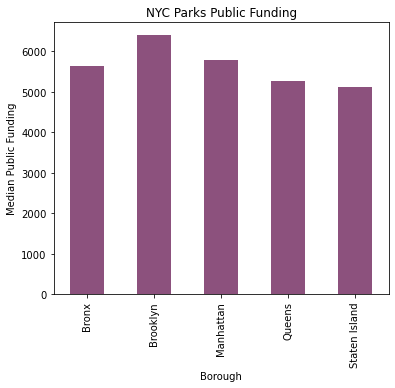

In [7]:
#Bar chart of median maintenance funding by borough
median_public_funding.plot(kind='bar', title='NYC Parks Public Funding', ylabel='Median Public Funding',
         xlabel='Borough', figsize=(6, 5), color=['#8C517D'])
plt.show()

In [8]:
#Median private funding per borough
df.groupby(['boro']).median()['private_funding']

boro
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: private_funding, dtype: float64

In [9]:
#Total public funding by borough
public_sum= df.pivot_table(index=['boro'],aggfunc={'maintenance_funding':np.sum})

#Total private funding by borough
private_sum= df.pivot_table(index=['boro'],aggfunc={'private_funding':np.sum})

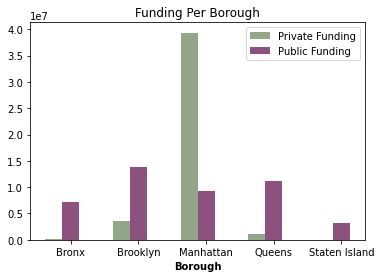

In [10]:
#Plotting private and public funding per borough

barWidth=0.25

bars1 = private_sum['private_funding']
bars2 = public_sum['maintenance_funding']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#92A68A', width=barWidth, label="Private Funding")
plt.bar(r2, bars2, color="#8C517D", width=barWidth, label="Public Funding")

plt.xlabel("Borough", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.title('Funding Per Borough')
plt.legend()
plt.show()

In [11]:
#Public funding as percentage of total public funding of NYC Parks
percentage_maintenance= df.groupby(['boro']).sum()['maintenance_funding']/df.sum()['maintenance_funding']*100
print(percentage_maintenance)

boro
Bronx            15.970383
Brooklyn         30.971032
Manhattan        20.752147
Queens           25.161182
Staten Island     7.145256
Name: maintenance_funding, dtype: float64


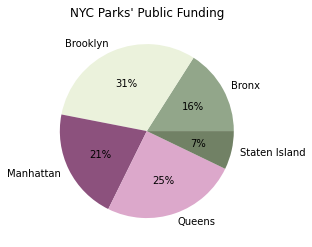

<Figure size 432x288 with 0 Axes>

In [12]:
#Plotting distribution of public funding by borough
public_pie=percentage_maintenance
labels=["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
colors=["#92A68A",'#EBF2DC', "#8C517D","#DCA8CB","#718165"]
plt.pie(public_pie, labels= labels, colors= colors,autopct='%.0f%%')
plt.title("NYC Parks' Public Funding")

fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('public_perc.svg', dpi=100) 

In [13]:
#Private funding as percentage of total public funding of NYC Parks
percentage_private= df.groupby(['boro']).sum()['private_funding']/df.sum()['private_funding']*100
print(percentage_private)

boro
Bronx             0.328257
Brooklyn          7.905438
Manhattan        89.117870
Queens            2.648436
Staten Island     0.000000
Name: private_funding, dtype: float64


In [14]:
#Drop 0 (Staten Island) for plot 
percentage_private = percentage_private.drop(["Staten Island"])

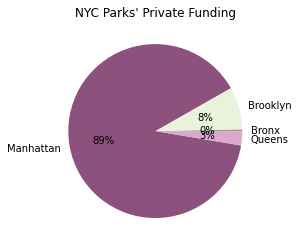

In [15]:
#Plotting distribution of private funding by borough
private_pie=percentage_private
labels2=["Bronx", "Brooklyn", "Manhattan", "Queens"]
colors2=["#92A68A",'#EBF2DC', "#8C517D","#DCA8CB"]
plt.pie(private_pie, labels= labels2, colors= colors2, autopct='%.0f%%')
plt.title("NYC Parks' Private Funding")
plt.show()

In [16]:
#Calculating total funding per park 
df['total_funding']=df['maintenance_funding']+df['private_funding']

In [17]:
#Parks with highest total funding
df.sort_values(by= 'total_funding', ascending=False).head(11)

,boro,Name_Proper,maintenance_funding,private_funding,ACREAGE,total_funding
281,Manhattan,Central Park,446300,24717743,840.64,25164043
234,Manhattan,Bryant Park,2408,8584181,9.60,8586589
1462,Brooklyn,Prospect Park,1173653,1942874,540.51,3116527
571,Queens,Flushing Meadows Corona Park,2111504,595902,897.69,2707406
1523,Manhattan,Riverside Park,724119,1370333,260.44,2094452
218,Brooklyn,Brooklyn Bridge Park,13008,1482623,21.38,1495631
1039,Manhattan,Madison Square Park,14042,1421056,6.23,1435098
1755,Manhattan,The Battery,45736,1358909,21.88,1404645
540,Manhattan,Father Duffy Square,1092,1112098,0.08,1113190
577,Queens,Forest Park,1112711,0,506.86,1112711


#### 2. Prepare park_properties for join with funding data

In [19]:
parks_properties.loc[parks_properties['name311'] == "Highbridge Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
626,1899-12-08 00:00:00.0000000,130.10,506 EDGECOMBE AVENUE,M,PARK,2010-01-06 00:00:00.0000000,110112.0,10.0,M-12A,Highbridge Park,...,32.0,F,Highbridge Park,Large Park,Community Park,http://www.nycgovparks.org/parks/M037/,13.0,T,1.003210e+24,"MULTIPOLYGON (((-73.93212 40.84617, -73.93162 ..."
1145,1937-06-23 00:00:00.0000000,0.82,1345 DR M L KING JR BLVD,X,PARK,2010-01-06 00:00:00.0000000,204.0,16.0,X-04,Highbridge Park,...,44.0,F,Highbridge Park,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/X120/,15.0,F,1.045200e+04,"POLYGON ((-73.92630 40.84222, -73.92641 40.842..."


In [20]:
parks_properties.at[626,'name311']="Highbridge Park (M)"
parks_properties.at[1145,'name311']="Highbridge Park (X)"

In [21]:
parks_properties.loc[parks_properties['name311'] == "Belmont Playground"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
1049,1955-05-11 00:00:00.0000000,0.682,265 FORBELL STREET,B,PARK,2010-01-06 00:00:00.0000000,305.0,37.0,B-05,Belmont Playground (PS 214),...,75.0,F,Belmont Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/B283/,8.0,F,11208.0,"POLYGON ((-73.86264 40.67534, -73.86307 40.675..."
1142,1936-08-21 00:00:00.0000000,2.213,670 EAST 182 STREET,X,PARK,2010-01-06 00:00:00.0000000,206.0,15.0,X-06,Belmont Playground,...,48.0,F,Belmont Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X108/,15.0,F,10457.0,"POLYGON ((-73.88697 40.85004, -73.88747 40.849..."


In [22]:
parks_properties.at[1049,'name311']='Belmont Playground (B)'
parks_properties.at[1142,'name311']='Belmont Playground (X)'

In [23]:
parks_properties.loc[parks_properties['name311'] == "Columbus Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
802,1935-05-16 00:00:00.0000000,4.140,225 JORALEMON STREET,B,PARK,2010-01-06 00:00:00.0000000,302.0,33.0,B-02,Columbus Park,...,84.0,F,Columbus Park,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/B113C/,7.0,F,11201.0,"POLYGON ((-73.98912 40.69492, -73.98913 40.694..."
1183,1894-07-19 00:00:00.0000000,3.233,55 MULBERRY STREET,M,PARK,2010-01-06 00:00:00.0000000,103.0,1.0,M-01,Columbus Park,...,5.0,F,Columbus Park,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/M015/,7.0,F,10013.0,"POLYGON ((-73.99975 40.71518, -73.99964 40.714..."


In [24]:
parks_properties.at[802,'name311']='Columbus Park (B)'
parks_properties.at[1183,'name311']='Columbus Park (M)'

In [25]:
parks_properties.loc[parks_properties['name311'] == "Washington Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
1198,1948-06-17 00:00:00.0000000,1.549,364 5 AVENUE,B,PARK,2010-01-06 00:00:00.0000000,306.0,39.0,B-06,JHS 51 JOP,...,78.0,F,Washington Park,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/B111A/,7.0,F,11215.0,"POLYGON ((-73.98509 40.67267, -73.98506 40.672..."
1859,1997-01-16 00:00:00.0000000,0.516,449-465 EAST 183 STREET,X,PARK,2010-01-06 00:00:00.0000000,206.0,15.0,X-06,Washington Park,...,48.0,F,Washington Park,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X280/,15.0,F,10458.0,"POLYGON ((-73.89315 40.85598, -73.89333 40.855..."


In [26]:
parks_properties.at[1198,'name311']='Washington Park (B)'
parks_properties.at[1859,'name311']='Washington Park (X)'

In [27]:
parks_properties.loc[parks_properties['name311'] == "St. Mary's Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
532,1888-12-12 00:00:00.0000000,35.311,376 ST ANN'S AV,X,PARK,2010-01-06 00:00:00.0000000,201.0,8.0,X-01,St. Mary's Park,...,40.0,F,St. Mary's Park,Large Park,Community Park,http://www.nycgovparks.org/parks/X045/,15.0,F,1.045410e+09,"POLYGON ((-73.91070 40.80905, -73.91076 40.808..."
1788,1934-12-04 00:00:00.0000000,0.345,422 SMITH STREET,B,PARK,2010-01-06 00:00:00.0000000,306.0,39.0,B-06,St. Mary's Playground,...,76.0,F,St. Mary's Park,Neighborhood Plgd,Recreation Field/Courts,http://www.nycgovparks.org/parks/B118A/,7.0,F,1.123100e+04,"POLYGON ((-73.99697 40.67666, -73.99722 40.676..."
1851,1934-12-04 00:00:00.0000000,0.367,440 SMITH STREET,B,PARK,2010-01-06 00:00:00.0000000,306.0,39.0,B-06,St. Mary's Playground,...,76.0,F,St. Mary's Park,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B118B/,7.0,F,1.123100e+04,"POLYGON ((-73.99729 40.67601, -73.99753 40.675..."


In [28]:
parks_properties.at[532,'name311']="St. Mary's Park (X)"
parks_properties.at[1788,'name311']="St. Mary's Park(B1)"
parks_properties.at[1851,'name311']="St. Mary's Park(B2)"

In [29]:
parks_properties.loc[parks_properties['name311'] == "Spring Creek Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
191,1949-06-16 00:00:00.0000000,2.203,None,B,PARK,2012-05-08 00:00:00.0000000,305318.0,42.0,B-18,Spring Creek Park,...,75.0,F,Spring Creek Park,Fill,Nature Area,None,8.0,T,1.123900e+04,"POLYGON ((-73.87857 40.63987, -73.87872 40.639..."
1244,1938-05-12 00:00:00.0000000,54.780,None,B,PARK,2010-01-06 00:00:00.0000000,305410.0,3242.0,B-05,Spring Creek Park,...,75.0,F,Spring Creek Park,Large Park,Nature Area,http://www.nycgovparks.org/parks/B165/,8.0,T,1.120811e+09,"MULTIPOLYGON (((-73.85801 40.66121, -73.85807 ..."
1965,2009-01-28 00:00:00.0000000,42.583,None,B,PARK,2010-01-06 00:00:00.0000000,305.0,42.0,B-05,Spring Creek Park,...,75.0,F,Spring Creek Park,REDEC,Community Park,http://www.nycgovparks.org/parks/B371/,8.0,T,1.120811e+14,"MULTIPOLYGON (((-73.87119 40.64956, -73.87098 ..."


In [30]:
parks_properties.at[191,'name311']="Spring Creek Park (B1)"
parks_properties.at[1244,'name311']="Spring Creek Park (B3)"
parks_properties.at[1965,'name311']="Spring Creek Park (B2)"

In [31]:
parks_properties.loc[parks_properties['name311'] == "Fox Playground"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
807,1979-07-17 00:00:00.0000000,0.94,724 FOX STREET,X,PARK,2010-01-06 00:00:00.0000000,202.0,8.0,X-02,Fox Playground,...,41.0,F,Fox Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X247/,15.0,F,10455.0,"POLYGON ((-73.89784 40.81494, -73.89806 40.814..."
1056,1950-04-26 00:00:00.0000000,2.27,1037 EAST 54 STREET,B,PARK,2010-01-06 00:00:00.0000000,318.0,46.0,B-18,Fox Playground,...,63.0,F,Fox Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/B248/,8.0,F,11234.0,"POLYGON ((-73.92365 40.63303, -73.92349 40.631..."


In [32]:
parks_properties.at[807,'name311']="Fox Playground (X)"
parks_properties.at[1056,'name311']="Fox Playground (B)"

In [33]:
parks_properties.loc[parks_properties['name311'] == "Railroad Park"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
1417,1896-08-18 00:00:00.0000000,0.732,None,X,PARK,2010-01-06 00:00:00.0000000,203.0,17.0,X-03,Railroad Park,...,42.0,F,Railroad Park,Neighborhood Plgd,Neighborhood Park,http://www.nycgovparks.org/parks/X032/,15.0,F,10451.0,"POLYGON ((-73.91487 40.82521, -73.91546 40.824..."


In [34]:
parks_properties.at[1417,'name311']="Railroad Park (X)"

In [35]:
parks_properties.loc[parks_properties['name311'] == "Miracle Garden"]

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
695,2001-11-20 00:00:00.0000000,0.110,None,X,PARK,2010-01-06 00:00:00.0000000,206.0,17.0,X-06,Miracle Garden,...,48.0,F,Miracle Garden,Greenthumb,Garden,http://www.nycgovparks.org/parks/X329/,15.0,F,10460.0,"POLYGON ((-73.88750 40.84268, -73.88789 40.842..."
833,1999-07-12 00:00:00.0000000,0.117,196 EAST 3 STREET,M,PARK,2010-01-06 00:00:00.0000000,103.0,2.0,M-03,Miracle Garden,...,9.0,F,Miracle Garden,Greenthumb,Garden,http://www.nycgovparks.org/parks/M314/,12.0,F,10009.0,"POLYGON ((-73.98353 40.72251, -73.98355 40.722..."


In [36]:
parks_properties.at[695,'name311']="Miracle Garden (X)"
parks_properties.at[833,'name311']="Miracle Garden (M)"

In [37]:
#Set index as name311 to remove parks, sitting areas, lots and gardens that
#do not have names and cannot be joined to funding data
parks_properties= parks_properties.set_index('name311').drop(["Park", "Sitting Area", "Lot", "Garden"])

In [38]:
#Reset Index
parks_properties= parks_properties.reset_index()

In [39]:
#Renaming column to create common field with parks funding dataframe
parks_ready= parks_properties.rename(columns = {'name311':'Name_Proper'})

#### 3. Prepare funding data for join

In [40]:
#Drop parks/areas in funding data that do not have names before joins to avoid duplicates
df_new= df.set_index("Name_Proper")
df_new= df_new.drop(["Park", "Garden", "Lot"])
df_new= df_new.reset_index()

#### 4. Join park funding to park propeties and NTAs

In [42]:
#Joining parks funding to parks geodataframe 
parks_full= pd.merge(parks_ready, df_new, on='Name_Proper', how='left')

In [43]:
#Spatial join of parks onto ntas
merged= gpd.sjoin(parks_full, nta,  how='left', predicate='within')

In [44]:
#Creating new dataframe with the necessary columns
full_df= merged[['maintenance_funding', 'private_funding', 'total_funding', 'ACREAGE','borocode','boro', 'nta2020', 'ntaname', 'Name_Proper', 'geometry']] 

#### 5. Aggregate data to NTAs

In [45]:
#Drop duplicates to avoid having parks counted twice
new_df= full_df.drop_duplicates(subset=['Name_Proper'])

In [47]:
# Calculating the sum of private, public and total funding as well as total park acreage in each NTA
sum_funding= new_df.groupby('nta2020').sum()['total_funding']
sum_private=new_df.groupby('nta2020').sum()['private_funding']
sum_public=new_df.groupby('nta2020').sum()['maintenance_funding']
sum_acreage=new_df.groupby('nta2020').sum()['ACREAGE']

In [48]:
#Dataframe with NTA funding info
nta_funding = pd.concat([sum_funding, sum_private,sum_public, sum_acreage], axis=1, join='inner')

In [49]:
#Normalize the funding by park acreage 
nta_funding['norm_maint']=nta_funding['maintenance_funding']/nta_funding['ACREAGE']
nta_funding['norm_priv']=nta_funding['private_funding']/nta_funding['ACREAGE']
nta_funding['norm_tot']=nta_funding['total_funding']/nta_funding['ACREAGE']

In [50]:
#Join nta funding data to data geoframe
nta_full= pd.merge(nta, nta_funding, on='nta2020', how='left')

In [51]:
#nta_full.to_file("/Users/juliekerisel/Desktop/info615/full_df/nta_full.shp")  

#### 6. Mapping NTA park-funding

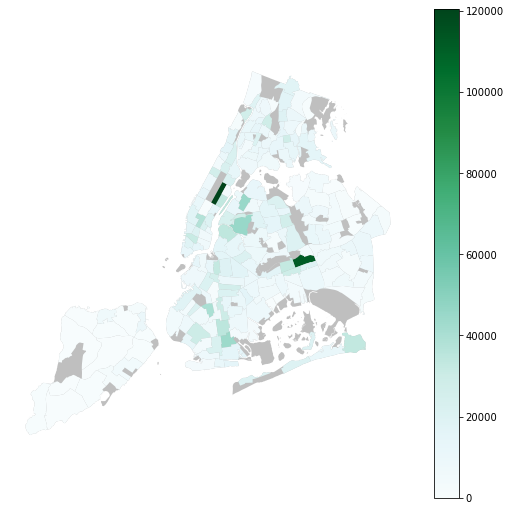

In [52]:
#Mapping normalized maintenance funding of park acreage
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full.plot (column='norm_maint', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

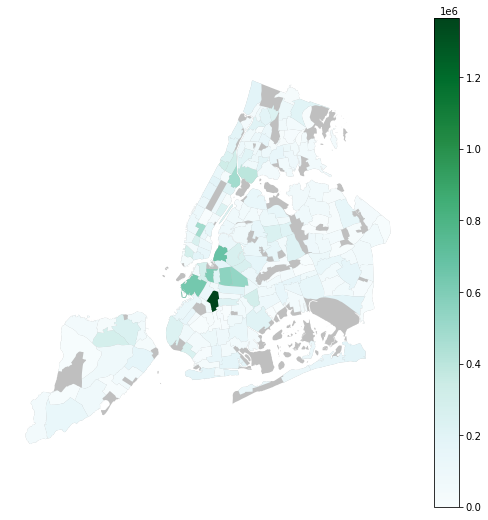

In [53]:
#Mapping maintenance funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full.plot (column='maintenance_funding', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

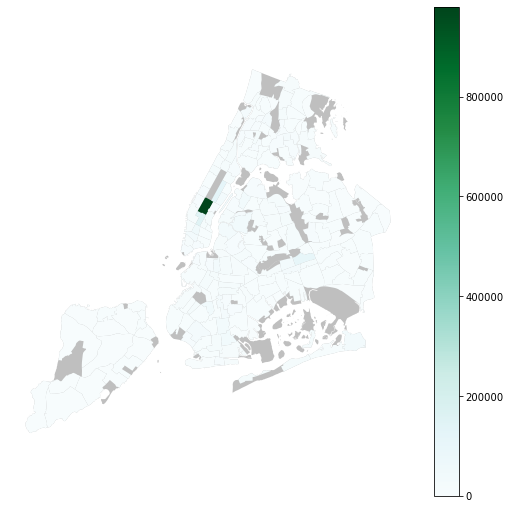

In [54]:
#Mapping normalized total funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full.plot (column='norm_tot', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

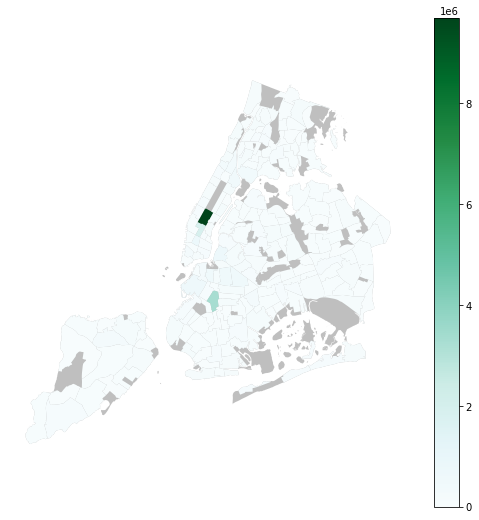

In [55]:
#Mapping total funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full.plot (column='total_funding', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

#### 7. Exploring whether removing outliers would lead to signifiantly different results

In [56]:
new_df.sort_values(by= 'total_funding', ascending=False).head(10)

,maintenance_funding,private_funding,total_funding,ACREAGE,borocode,boro,nta2020,ntaname,Name_Proper,geometry
1639,446300.0,24717743.0,25164043.0,840.64,NaN,Manhattan,NaN,NaN,Central Park,"MULTIPOLYGON (((-73.95773 40.80027, -73.94991 ..."
393,2408.0,8584181.0,8586589.0,9.60,1.0,Manhattan,MN0502,Midtown-Times Square,Bryant Park,"POLYGON ((-73.98341 40.75297, -73.98480 40.753..."
829,1173653.0,1942874.0,3116527.0,540.51,3.0,Brooklyn,BK5591,Prospect Park,Prospect Park,"POLYGON ((-73.96881 40.67189, -73.96867 40.671..."
1340,2111504.0,595902.0,2707406.0,897.69,NaN,Queens,NaN,NaN,Flushing Meadows Corona Park,"MULTIPOLYGON (((-73.84510 40.75388, -73.84498 ..."
848,724119.0,1370333.0,2094452.0,260.44,NaN,Manhattan,NaN,NaN,Riverside Park,"MULTIPOLYGON (((-73.95194 40.82760, -73.95218 ..."
197,13008.0,1482623.0,1495631.0,21.38,NaN,Brooklyn,NaN,NaN,Brooklyn Bridge Park,"MULTIPOLYGON (((-74.00228 40.69261, -74.00400 ..."
104,14042.0,1421056.0,1435098.0,6.23,1.0,Manhattan,MN0501,Midtown South-Flatiron-Union Square,Madison Square Park,"POLYGON ((-73.98678 40.74276, -73.98801 40.741..."
1894,45736.0,1358909.0,1404645.0,21.88,NaN,Manhattan,NaN,NaN,The Battery,"MULTIPOLYGON (((-74.01637 40.70462, -74.01447 ..."
672,1092.0,1112098.0,1113190.0,0.08,1.0,Manhattan,MN0502,Midtown-Times Square,Father Duffy Square,"POLYGON ((-73.98509 40.75883, -73.98511 40.758..."
224,1112711.0,0.0,1112711.0,506.86,NaN,Queens,NaN,NaN,Forest Park,"MULTIPOLYGON (((-73.86027 40.70234, -73.86012 ..."


In [57]:
#Version without Bryant Park or Prospect Park 
local_df= new_df.drop([393, 829])

In [58]:
#Calculating the sum of private, public and total funding as well as total park acreage in each NTA
sum_funding2= local_df.groupby('nta2020').sum()['total_funding']
sum_private2=local_df.groupby('nta2020').sum()['private_funding']
sum_public2=local_df.groupby('nta2020').sum()['maintenance_funding']
sum_acreage2=local_df.groupby('nta2020').sum()['ACREAGE']

In [59]:
#Dataframe with NTA funding info
nta_funding2 = pd.concat([sum_funding2, sum_private2, sum_public2, sum_acreage2], axis=1, join='inner')

In [60]:
#Normalize the funding by park acreage 
nta_funding2['norm_maint']=nta_funding2['maintenance_funding']/nta_funding2['ACREAGE']
nta_funding2['norm_priv']=nta_funding2['private_funding']/nta_funding2['ACREAGE']
nta_funding2['norm_tot']=nta_funding2['total_funding']/nta_funding2['ACREAGE']

In [61]:
#Join nta funding data to data geoframe
nta_full2= pd.merge(nta, nta_funding2, on='nta2020', how='left')

In [62]:
#nta_full2.to_file("/Users/juliekerisel/Desktop/info615/local_df/nta_local.shp")  

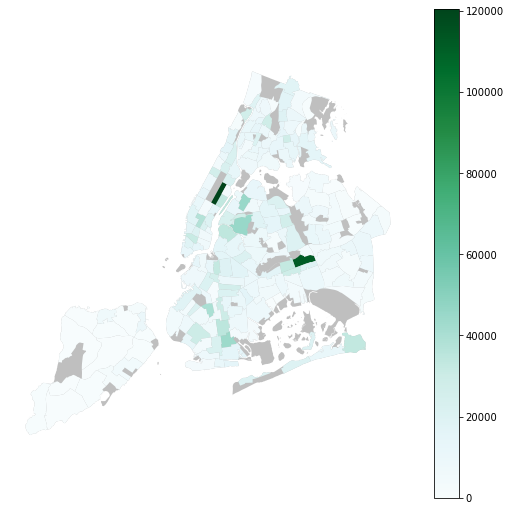

In [63]:
#Mapping normalized maintenance funding of park acreage
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full2.plot (column='norm_maint', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

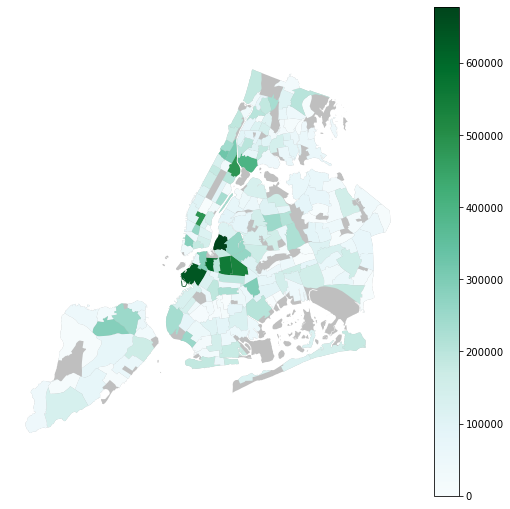

In [64]:
#Mapping maintenance funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full2.plot (column='maintenance_funding', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

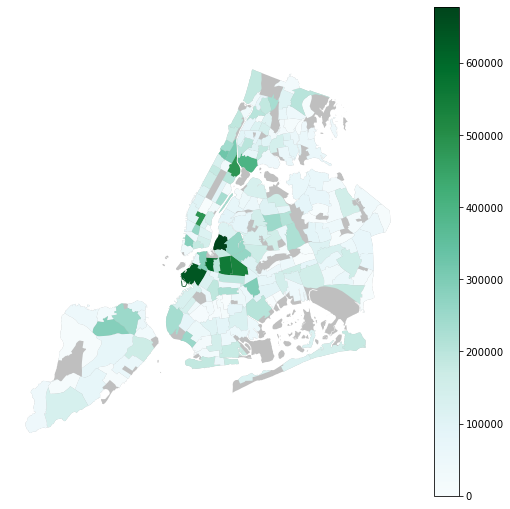

In [65]:
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full2.plot (column='maintenance_funding', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

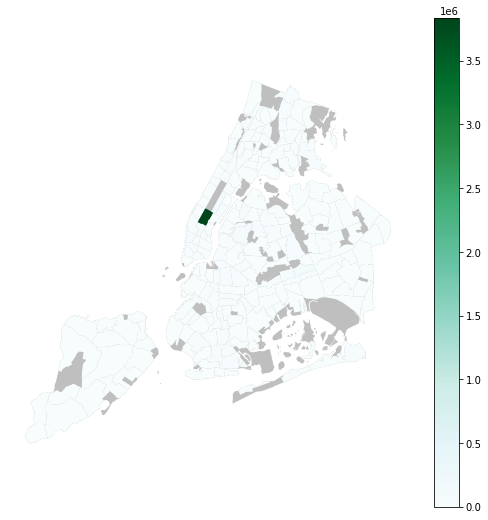

In [66]:
#Mapping normalized total funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full2.plot (column='norm_tot', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');

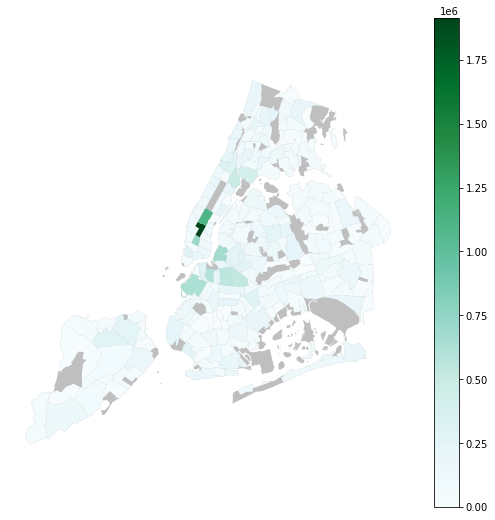

In [67]:
#Mapping total funding in each NTA
fig, ax = plt.subplots(figsize=(9, 9))
boros.plot(alpha=0.5,facecolor='grey', linewidth=2, ax=ax)
nta_full2.plot (column='total_funding', ax=ax, legend=True, cmap='BuGn')
ax.axis('off');